# Customer Segmentation Using K-Means Clustering

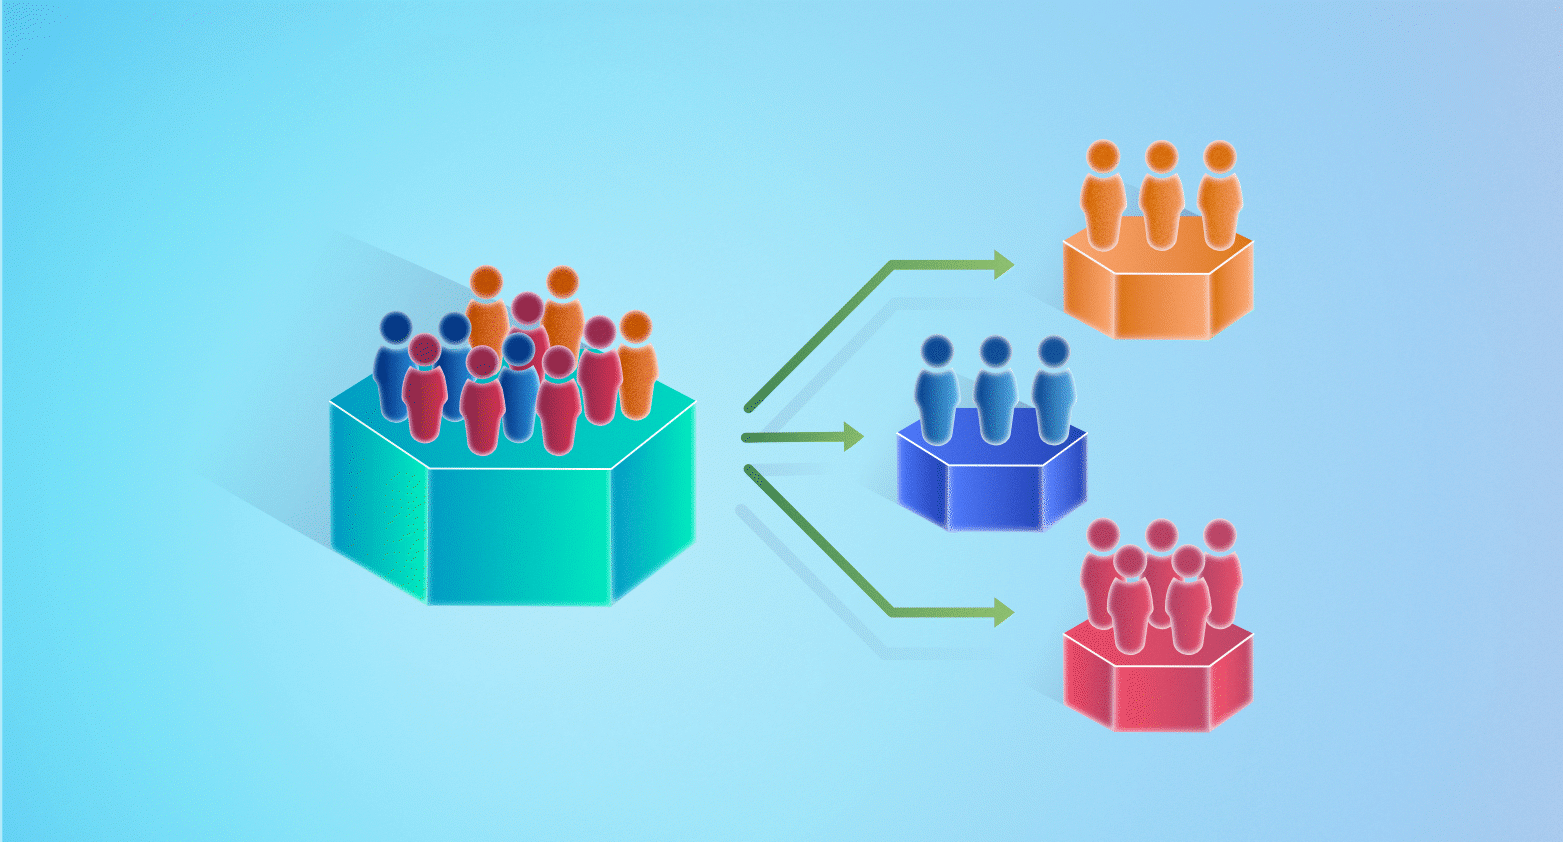

Importing Dependencies

In [2]:
#EDA Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Clustering Library
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

## Data Collection and Analysis

In [3]:
data_customers = pd.read_csv('Mall_Customers.csv')
data_customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data_customers.shape

(200, 5)

In [5]:
data_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


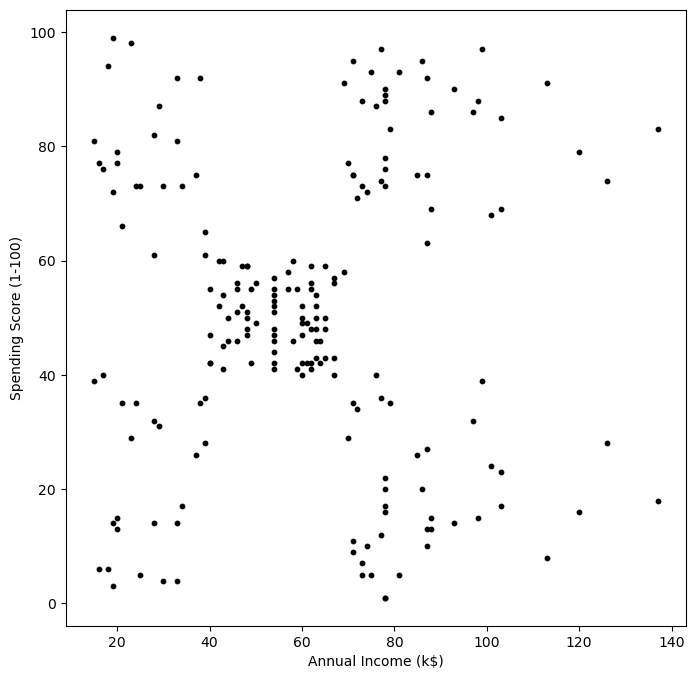

In [14]:
plt.figure(figsize = (8,8))
plt.scatter(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', data = data_customers, s = 10, c = 'black')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

Choosing the Annual Income and Spending Score columns 

In [15]:
X = data_customers.iloc[:, 3:].values

In [16]:
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

## Choosing the number of clusters

In [17]:
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    
    wcss.append(kmeans.inertia_)

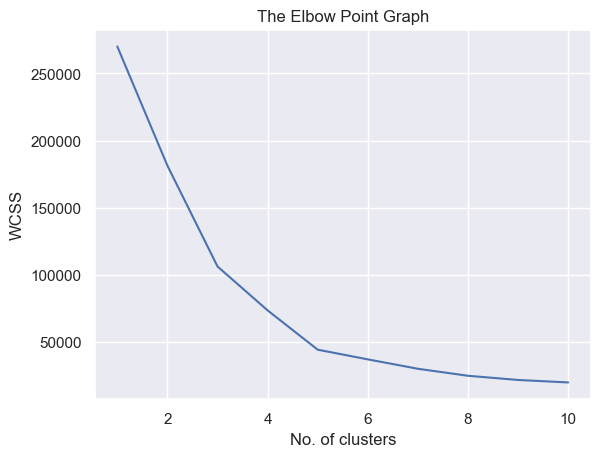

In [18]:
sns.set()
plt.plot(range(1,11), wcss)
plt.title("The Elbow Point Graph")
plt.xlabel("No. of clusters")
plt.ylabel("WCSS")
plt.show()

Optimum Number of Clusters  = 5

## Training the K-Means Clustering Model

In [19]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)

Y = kmeans.fit_predict(X)

In [20]:
print(Y)

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


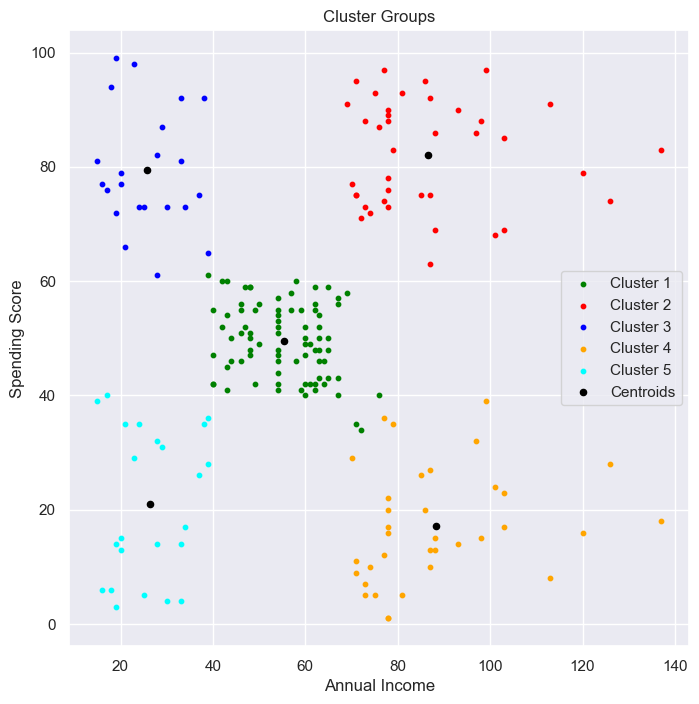

In [23]:
plt.figure(figsize= (8,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s= 10, c='green', label = 'Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s= 10, c='red', label = 'Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s= 10, c='blue', label = 'Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s= 10, c='orange', label = 'Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s= 10, c='cyan', label = 'Cluster 5')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 20, c='black', label = 'Centroids')

plt.title('Cluster Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

5 Segments can be defined over the Customers on the basis of their Spending Score and Annual Income.

From Observation we can infer that:

Segment 1 : Average Annual Income, Average Spending Score

Segment 2 : High Annual Income, High Spending Score

Segment 3 : Low Annual Income, High Spending Score

Segment 4 : High Annual Income, Low Spending Score

Segment 5 : Low Annual Income, Low Spending Score


### Therefore, Segment 1 and 2 can be targetted as they are most profitable to the mall